In [1]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import all the files needed
df_vehicle_re = pd.read_csv('../../../data/raw/mv1.csv')
df_MSA_DVMT = pd.read_csv('../../../data/raw/Miles-and-DVMT-by-County-and-Functional-Class-2022.csv')#this generate lsit, list has no following function but have to convert it to dataframe
df_town_DVMT = pd.read_excel('../../../data/raw/Town-DVMT.xlsx')
df_population = pd.read_csv('../../../data/tidy/population_five_towns.csv')
df_population

,Unnamed: 0,Year,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area"
0,0,2021,3605330,986344,1238888,864751
1,1,2020,3570549,972981,1231523,855733
2,2,2017,3594478,976389,1239055,862127
3,3,2015,3593222,969332,1240217,862224


In [3]:
#DVMT in the five selected towns
Bridgewater = df_town_DVMT[df_town_DVMT['Town'] =='Bridgewater']['DVMT']
NewMilford = df_town_DVMT[df_town_DVMT['Town'] =='New Milford']['DVMT']
Lyme = df_town_DVMT[df_town_DVMT['Town'] =='Lyme']['DVMT']
oldLyme = df_town_DVMT[df_town_DVMT['Town'] =='Old Lyme']['DVMT']
Lyme = df_town_DVMT[df_town_DVMT['Town'] =='Colchester']['DVMT']

In [4]:
statewide_vehicle=df_vehicle_re.iloc[14,:]

#the total number of each vehicle type
statewide_automobile=statewide_vehicle[3]
statewide_buses=statewide_vehicle[6]
statewide_trucks=statewide_vehicle[9]
statewide_motorcycle=statewide_vehicle[12]
statewide_total=statewide_vehicle[15]

#ratio of each vehicle type to the total
statewide_automobile=int(statewide_automobile.translate(str.maketrans('','',string.punctuation)))
statewide_buses=int(statewide_buses.translate(str.maketrans('','',string.punctuation)))
statewide_trucks=int(statewide_trucks.translate(str.maketrans('','',string.punctuation)))
statewide_motorcycle=int(statewide_motorcycle.translate(str.maketrans('','',string.punctuation)))
statewide_total=int(statewide_total.translate(str.maketrans('','',string.punctuation)))

automobile_rat=statewide_automobile/statewide_total
buses_rat=statewide_buses/statewide_total
trucks_rat=statewide_trucks/statewide_total
motorcycle_rat=statewide_motorcycle/statewide_total

statewide_vehicle=statewide_vehicle.to_numpy()

statewide_vehicle

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17500\705948198.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statewide_automobile=statewide_vehicle[3]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17500\705948198.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statewide_buses=statewide_vehicle[6]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17500\705948198.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statew

array(['Connecticut (2)', '1,118,807', '471', '1,119,278', '10,191', '31',
       '10,222', '1,539,460', '4,305', '1,543,765', '83,220', '— ',
       '83,220', '2,751,678', '4,807', '2,756,485'], dtype=object)

In [5]:
#plot the vehicle distribution in CT
array = [ ["State", "Automobile","Automobile","Automobile","Buses","Buses","Buses","Trucks",
            "Trucks","Trucks","Motorcycles","Motorcycles","Motorcycles", "All Motor Vehicles",
            "All Motor Vehicles","All Motor Vehicles"],[" ","Private and Commercial","Publicly Owned",
            "Total","Private and Commercial","Publicly Owned","Total", "Private and Commercial","Publicly Owned",
            "Total", "Private and Commercial","Publicly Owned","Total", "Private and Commercial","Publicly Owned","Total"]]
tuples=list(zip(*array))
index = pd.MultiIndex.from_tuples(tuples)
statewide_vehicle=pd.Series(statewide_vehicle,index=index)
statewide_vehicle.to_frame()

0
State                                      Connecticut (2)
Automobile         Private and Commercial        1,118,807
                   Publicly Owned                      471
                   Total                         1,119,278
Buses              Private and Commercial           10,191
                   Publicly Owned                       31
                   Total                            10,222
Trucks             Private and Commercial        1,539,460
                   Publicly Owned                    4,305
                   Total                         1,543,765
Motorcycles        Private and Commercial           83,220
                   Publicly Owned                       — 
                   Total                            83,220
All Motor Vehicles Private and Commercial        2,751,678
                   Publicly Owned                    4,807
                   Total                         2,756,485

In [6]:
import pandas as pd

# Simplified array
array = [
    ["State"] * 1 + ["Automobile"] * 3 + ["Buses"] * 3 + ["Trucks"] * 3 + ["Motorcycles"] * 3 + ["All Motor Vehicles"] * 3,
    [" "] + ["Private and Commercial", "Publicly Owned", "Total"] * 5
]

# Create MultiIndex directly
index = pd.MultiIndex.from_arrays(array)

# Create a Series
statewide_vehicle = pd.Series(index=index)

# Convert to DataFrame
statewide_vehicle_df = statewide_vehicle.to_frame()

print(statewide_vehicle_df)


                                            0
State                                     NaN
Automobile         Private and Commercial NaN
                   Publicly Owned         NaN
                   Total                  NaN
Buses              Private and Commercial NaN
                   Publicly Owned         NaN
                   Total                  NaN
Trucks             Private and Commercial NaN
                   Publicly Owned         NaN
                   Total                  NaN
Motorcycles        Private and Commercial NaN
                   Publicly Owned         NaN
                   Total                  NaN
All Motor Vehicles Private and Commercial NaN
                   Publicly Owned         NaN
                   Total                  NaN


In [7]:
df_MSA_DVMT_row_index=df_MSA_DVMT.iloc[0:10,0].to_numpy()
df_MSA_DVMT=df_MSA_DVMT.iloc[0:10,16]
df_MSA_DVMT.index =['County', 'Fairfield', 'Hartford', 'Litchfield', 'Middlesex',
       'New Haven', 'New London', 'Tolland', 'Windham', 'Total']

#Fairfield_dvmt=df_MSA_DVMT.iat[1,16]
#Hartford_dvmt=df_MSA_DVMT.iat[1,16]
df_MSA_DVMT

County              DVMT
Fairfield     19,552,833
Hartford      20,232,219
Litchfield     3,989,256
Middlesex      4,841,784
New Haven     18,936,670
New London     7,301,505
Tolland        3,609,319
Windham        2,813,990
Total         81,277,576
Name: Unnamed: 16, dtype: object

In [8]:
#Calculate the total number of VMT in each MSAs

New_haven_msa_vmt=int(df_MSA_DVMT.at['New Haven'].translate(str.maketrans('','',string.punctuation)))*365
Hartford_msa_vmt=int(df_MSA_DVMT.at['Hartford'].translate(str.maketrans('','',string.punctuation)))*365+int(df_MSA_DVMT.at['Middlesex'].translate(str.maketrans('','',string.punctuation)))*365+int(df_MSA_DVMT.at['Tolland'].translate(str.maketrans('','',string.punctuation)))*365
Bridgeport_msa_vmt=int(df_MSA_DVMT.at['Fairfield'].translate(str.maketrans('','',string.punctuation)))*365
Statewide_vmt=int(df_MSA_DVMT.at['Total'].translate(str.maketrans('','',string.punctuation)))*365

In [9]:
#total_population=df_population.iloc[2,:].
statewide_popu=df_population.at[0,"Connecticut"]
Bri_MSA_popu=df_population.at[0,"Bridgeport-Stamford-Norwalk, CT Metro Area"]
Hart_MSA_popu=df_population.at[0,"Hartford-East Hartford-Middletown, CT Metro Area"]
NewH_MSA_popu=df_population.at[0,"New Haven-Milford, CT Metro Area"]

#the ratio of the population of each MSA to the total population in Connecticut
Bri_MSA_popu_per=Bri_MSA_popu/statewide_popu
Hart_MSA_popu_per=Hart_MSA_popu/statewide_popu
NewH_MSA_popu_per=NewH_MSA_popu/statewide_popu

In [10]:
#each types of vehicle in each MSAs
NH_automobile_vmt=New_haven_msa_vmt*automobile_rat
NH_buses_vmt=New_haven_msa_vmt*buses_rat
NH_trucks_vmt=New_haven_msa_vmt*trucks_rat
NH_motorcycle_vmt=New_haven_msa_vmt*motorcycle_rat

BSN_automobile_vmt=Bridgeport_msa_vmt*automobile_rat
BSN_buses_vmt=Bridgeport_msa_vmt*buses_rat
BSN_trucks_vmt=Bridgeport_msa_vmt*trucks_rat
BSN_motorcycle_vmt=Bridgeport_msa_vmt*motorcycle_rat

HH_automobile_vmt=Hartford_msa_vmt*automobile_rat
HH_buses_vmt=Hartford_msa_vmt*buses_rat
HH_trucks_vmt=Hartford_msa_vmt*trucks_rat
HH_motorcycle_vmt=Hartford_msa_vmt*motorcycle_rat

In [11]:
print(NH_automobile_vmt,NH_motorcycle_vmt,NH_trucks_vmt,NH_buses_vmt)

2806588940.3914404 208674102.07238567 3870989848.4231734 25631659.113000795


In [12]:
#average MPG for each vehicle type ( miles per gallons)
passenger_car_gasoline=24.1#automobile
passenger_car_diesel=32.4
light_truck_gasoline=18.5
light_truck_diesel=22.1#trucks
heavy_duty_gasoline=10.13
heavy_duty_diesel=12.96#buses
motorcycle_gasoline=50#motorcycle

#emission factor for different fuels (kg CO2/gallon)( referenced from the ghg tool community module)
gasoline=8.78
diesel=10.21

In [13]:
#calculate the fuel consumption in NH MSA
gaso_consump_NH= NH_automobile_vmt/passenger_car_gasoline+NH_motorcycle_vmt/motorcycle_gasoline
dies_consump_NH= NH_buses_vmt/heavy_duty_diesel+NH_trucks_vmt/light_truck_diesel

#calculate the fuel consumption in HH MSA
gaso_consump_HH= HH_automobile_vmt/passenger_car_gasoline+HH_motorcycle_vmt/motorcycle_gasoline
dies_consump_HH= HH_buses_vmt/heavy_duty_diesel+HH_trucks_vmt/light_truck_diesel

#calculate the fuel consumption in BSN MSA
gaso_consump_BSN= BSN_automobile_vmt/passenger_car_gasoline+BSN_motorcycle_vmt/motorcycle_gasoline
dies_consump_BSN= BSN_buses_vmt/heavy_duty_diesel+BSN_trucks_vmt/light_truck_diesel

#calculate the statewide fuel consumption
gaso_consump=Statewide_vmt*automobile_rat/passenger_car_gasoline+Statewide_vmt*motorcycle_rat/motorcycle_gasoline
dies_consump=Statewide_vmt*buses_rat/heavy_duty_diesel+Statewide_vmt*trucks_rat/light_truck_diesel

#calcualte the gasoline and diesel emissions: carbon dioxide emissions only
gaso_emissions_NH =gaso_consump_NH*gasoline/1000
gaso_emissions_HH = gaso_consump_HH*gasoline/1000
gaso_emissions_BSN= gaso_consump_BSN*gasoline/1000

#calcualte the diesel consumption 
dies_emissions_NH =dies_consump_NH*diesel/1000
dies_emissions_HH = dies_consump_HH*diesel/1000
dies_emissions_BSN= dies_consump_BSN*diesel/1000

#calculate the carbon dioxide consumption(metric tons):
CO2_NH=gaso_consump_NH*gasoline/1000+dies_consump_NH*diesel/1000
CO2_HH=gaso_consump_HH*gasoline/1000+dies_consump_HH*diesel/1000
CO2_BSN=gaso_consump_BSN*gasoline/1000+dies_consump_BSN*diesel/1000
CO2_statewide=gaso_consump*gasoline/1000+dies_consump*diesel/1000


#calcualte the gasoline and diesel emissions: carbon dioxide emissions only
gaso_emissions_NH =gaso_consump_NH*gasoline/1000+NH_automobile_vmt*CH4_gaso_passenger_car/1000000+NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000+NH_automobile_vmt*N2O_gaso_passenger_car/1000000 + NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000
gaso_emissions_HH = gaso_consump_HH*gasoline/1000+HH_automobile_vmt*CH4_gaso_passenger_car/1000000+HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000+HH_automobile_vmt*N2O_gaso_passenger_car/1000000 + HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000
gaso_emissions_BSN= gaso_consump_BSN*gasoline/1000+BSN_automobile_vmt*CH4_gaso_passenger_car/1000000+BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000+BSN_automobile_vmt*N2O_gaso_passenger_car/1000000+BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000

#calcualte the diesel consumption 
dies_emissions_NH =dies_consump_NH*diesel/1000+NH_buses_vmt*CH4_buses/1000000+NH_trucks_vmt*CH4_trucks/1000000+NH_buses_vmt*N2O_buses/1000000+NH_trucks_vmt*N2O_trucks/1000000
dies_emissions_HH = dies_consump_HH*diesel/1000+HH_buses_vmt*CH4_buses/1000000+HH_trucks_vmt*CH4_trucks/1000000+HH_buses_vmt*N2O_buses/1000000+HH_trucks_vmt*N2O_trucks/1000000
dies_emissions_BSN= dies_consump_BSN*diesel/1000+BSN_buses_vmt*CH4_buses/1000000+BSN_trucks_vmt*CH4_trucks/1000000+BSN_buses_vmt*N2O_buses/1000000+BSN_trucks_vmt*N2O_trucks/1000000


In [14]:
gaso_auto_NH=NH_automobile_vmt/passenger_car_gasoline
gaso_motor_NH=NH_motorcycle_vmt/motorcycle_gasoline
die_trucks_NH=NH_trucks_vmt/light_truck_diesel
die_buses_NH=NH_buses_vmt/heavy_duty_diesel
gaso_auto_BSN=BSN_automobile_vmt/passenger_car_gasoline
die_buses_BSN=BSN_buses_vmt/heavy_duty_diesel
die_trucks_BSN=BSN_trucks_vmt/light_truck_diesel
gaso_auto_HH=HH_automobile_vmt/passenger_car_gasoline
gaso_motor_HH=HH_motorcycle_vmt/motorcycle_gasoline
die_trucks_HH=HH_trucks_vmt/light_truck_diesel
die_buses_HH=HH_buses_vmt/heavy_duty_diesel
print(gaso_auto_HH,gaso_motor_HH,die_trucks_HH,die_buses_HH)

176395541.65434167 6321561.777021097 265311207.40595376 2995694.722818851


In [15]:
#emission factor for different vehicles : g/miles ( referenced from EPA emission hub)
# based on year 2005
CH4_gaso_passenger_car=0.008
N2O_gaso_passenger_car=0.007

CH4_gaso_motorcycle=0
N2O_gaso_motorcycle=0

CH4_buses=0.005
N2O_buses=0.005 #( meidum- heavy-duty vehicles in year 2005)

CH4_trucks=0.001 #( light-duty trucks)
N2O_trucks=0.001

In [16]:
#calculate the CH4 emission (metric tons):
CH4_NH=NH_automobile_vmt*CH4_gaso_passenger_car/1000000+NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000+NH_buses_vmt*CH4_buses/1000000+NH_trucks_vmt*CH4_trucks/1000000
CH4_HH=HH_automobile_vmt*CH4_gaso_passenger_car/1000000+HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000+HH_buses_vmt*CH4_buses/1000000+HH_trucks_vmt*CH4_trucks/1000000
CH4_BSN=BSN_automobile_vmt*CH4_gaso_passenger_car/1000000+BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000+BSN_buses_vmt*CH4_buses/1000000+BSN_trucks_vmt*CH4_trucks/1000000
CH4_statewide=Statewide_vmt*automobile_rat*CH4_gaso_passenger_car/1000000000+Statewide_vmt*motorcycle_rat*CH4_gaso_motorcycle/1000000+Statewide_vmt*buses_rat*CH4_buses/1000000+Statewide_vmt*trucks_rat*CH4_trucks/1000000

#convert to carbon dioxide equavelence:
CO2_equ_NH_1=CH4_NH*25
CO2_equ_HH_1=CH4_HH*25
CO2_equ_BSN_1=CH4_BSN*25
CO2_equ_state=CH4_statewide*25

#calculate the N2O emission (metric tons):
N2O_NH = NH_automobile_vmt*N2O_gaso_passenger_car/1000000 + NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000+NH_buses_vmt*N2O_buses/1000000+NH_trucks_vmt*N2O_trucks/1000000
N2O_HH=HH_automobile_vmt*N2O_gaso_passenger_car/1000000+HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000+HH_buses_vmt*N2O_buses/1000000+HH_trucks_vmt*N2O_trucks/1000000
N2O_BSN=BSN_automobile_vmt*N2O_gaso_passenger_car/1000000+BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000+BSN_buses_vmt*N2O_buses/1000000+BSN_trucks_vmt*N2O_trucks/1000000
N2O_statewide=Statewide_vmt*automobile_rat*N2O_gaso_passenger_car/1000000+Statewide_vmt*motorcycle_rat*N2O_gaso_motorcycle/1000000+Statewide_vmt*buses_rat*N2O_buses/1000000+Statewide_vmt*trucks_rat*N2O_trucks/1000000

#convert to carbon dioxide equavelence:
CO2_equ_NH_2=N2O_NH*298#define the number 
CO2_equ_HH_2=N2O_HH*298
CO2_equ_BSN_2=N2O_BSN*298
CO2_equ_state=N2O_statewide*298

In [17]:
#calculation of emissions from each types of vehicle,MMTCO2e(autombile, motorcycle, trucks, buses-NH,HH,BSN)
NH_automobile = (NH_automobile_vmt/passenger_car_gasoline*gasoline/1000+NH_automobile_vmt*CH4_gaso_passenger_car/1000000*25+NH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)/1000000
NH_motorcycle = (NH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000+NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25+NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)/1000000
NH_buses = (NH_buses_vmt/heavy_duty_diesel*diesel/1000+NH_buses_vmt*CH4_buses/1000000*25+NH_buses_vmt*N2O_buses/1000000*298)/1000000
NH_trucks = (NH_trucks_vmt/light_truck_diesel*diesel/1000+NH_trucks_vmt*CH4_trucks/1000000*25+NH_trucks_vmt*N2O_trucks/1000000*298)/1000000

HH_automobile = (HH_automobile_vmt/passenger_car_gasoline*gasoline/1000+HH_automobile_vmt*CH4_gaso_passenger_car/1000000*25+HH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)/1000000
HH_motorcycle = (HH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000+HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25+HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)/1000000
HH_buses = (HH_buses_vmt/heavy_duty_diesel*diesel/1000+HH_buses_vmt*CH4_buses/1000000*25+HH_buses_vmt*N2O_buses/1000000*298)/1000000
HH_trucks = (HH_trucks_vmt/light_truck_diesel*diesel/1000+HH_trucks_vmt*CH4_trucks/1000000*25+HH_trucks_vmt*N2O_trucks/1000000*298)/1000000

BSN_automobile = (BSN_automobile_vmt/passenger_car_gasoline*gasoline/1000+BSN_automobile_vmt*CH4_gaso_passenger_car/1000000*25+BSN_automobile_vmt*N2O_gaso_passenger_car/1000000*298)/1000000
BSN_motorcycle = (BSN_motorcycle_vmt/motorcycle_gasoline*gasoline/1000+BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25+BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)/1000000
BSN_buses = (BSN_buses_vmt/heavy_duty_diesel*diesel/1000+BSN_buses_vmt*CH4_buses/1000000*25+BSN_buses_vmt*N2O_buses/1000000*298)/1000000
BSN_trucks = (BSN_trucks_vmt/light_truck_diesel*diesel/1000+BSN_trucks_vmt*CH4_trucks/1000000*25+BSN_trucks_vmt*N2O_trucks/1000000*298)/1000000

total = BSN_automobile+BSN_motorcycle +BSN_buses+BSN_trucks

In [18]:
#breakdown of greenhouse gasese from each type of vehicles
#automobile

data = np.array([['NH_automobile', NH_automobile_vmt/passenger_car_gasoline*gasoline/1000000000,NH_automobile_vmt*CH4_gaso_passenger_car/1000000000000*25, NH_automobile_vmt*N2O_gaso_passenger_car/1000000*298/1000000],
                 ['HH_automobile',HH_automobile_vmt/passenger_car_gasoline*gasoline/1000000000,HH_automobile_vmt*CH4_gaso_passenger_car/1000000000000*25,HH_automobile_vmt*N2O_gaso_passenger_car/1000000000000*298],
                 ['BSN_automobile', BSN_automobile_vmt/passenger_car_gasoline*gasoline/1000000000,BSN_automobile_vmt*CH4_gaso_passenger_car/1000000000000*25,BSN_automobile_vmt*N2O_gaso_passenger_car/1000000000000*298],['NH_motorcycle', NH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000000000, NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000000000*25, NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000000000*298],
                 ['HH_motorcycle',HH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000000000, HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000000000*25, HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000000000*298],
                 ['BSN_motorcycle', BSN_motorcycle_vmt/motorcycle_gasoline*gasoline/1000000000, BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000000000*25, BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000000000*298],['NH_trucks', NH_trucks_vmt/light_truck_diesel*diesel/1000000000, NH_trucks_vmt*CH4_trucks/1000000000000*25, NH_trucks_vmt*N2O_trucks/1000000000000*298],
                 ['HH_trucks',HH_trucks_vmt/light_truck_diesel*diesel/1000000000, HH_trucks_vmt*CH4_trucks/1000000000000*25, HH_trucks_vmt*N2O_trucks/1000000000000*298],
                 ['BSN_trucks', BSN_trucks_vmt/light_truck_diesel*diesel/1000000000, BSN_trucks_vmt*CH4_trucks/1000000000000*25, BSN_trucks_vmt*N2O_trucks/1000000000000*298],['NH_buses', NH_buses_vmt/heavy_duty_diesel*diesel/1000000000,NH_buses_vmt*CH4_buses/1000000000000*25,NH_buses_vmt*N2O_buses/1000000000000*298],
                 ['HH_buses',HH_buses_vmt/heavy_duty_diesel*diesel/1000000000,HH_buses_vmt*CH4_buses/1000000000000*25,HH_buses_vmt*N2O_buses/1000000000000*298],
                 ['BSN_buses', BSN_buses_vmt/heavy_duty_diesel*diesel/1000000000,BSN_buses_vmt*CH4_buses/1000000000000*25,BSN_buses_vmt*N2O_buses/1000000000000*298],
                ])

df = pd.DataFrame(data, columns=['MSA', 'CO2 Emissions (MMTCO2e)','CH4 Emissions (MMTCO2e)','N2O Emissions (MMTCO2e)'])
df
df.to_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/mobile-emissions-breakdown.csv')

In [19]:
print(NH_automobile_vmt/passenger_car_gasoline*gasoline/1000,NH_automobile_vmt*CH4_gaso_passenger_car/1000000*25,NH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)
print(NH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000,NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25,NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)
print(NH_buses_vmt/heavy_duty_diesel*diesel/1000,NH_buses_vmt*CH4_buses/1000000*25,NH_buses_vmt*N2O_buses/1000000*298)
print(NH_trucks_vmt/light_truck_diesel*diesel/1000,NH_trucks_vmt*CH4_trucks/1000000*25,NH_trucks_vmt*N2O_trucks/1000000*298)

print(HH_automobile_vmt/passenger_car_gasoline*gasoline/1000,HH_automobile_vmt*CH4_gaso_passenger_car/1000000*25,HH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)
print(HH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000,HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25,HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)
print(NH_buses_vmt/heavy_duty_diesel*diesel/1000,HH_buses_vmt*CH4_buses/1000000*25,HH_buses_vmt*N2O_buses/1000000*298)
print(NH_trucks_vmt/light_truck_diesel*diesel/1000,HH_trucks_vmt*CH4_trucks/1000000*25,HH_trucks_vmt*N2O_trucks/1000000*298)

print(BSN_automobile_vmt/passenger_car_gasoline*gasoline/1000,BSN_automobile_vmt*CH4_gaso_passenger_car/1000000*25,BSN_automobile_vmt*N2O_gaso_passenger_car/1000000*298)
print(BSN_motorcycle_vmt/motorcycle_gasoline*gasoline/1000,BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25,BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)
print(NH_buses_vmt/heavy_duty_diesel*diesel/1000,BSN_buses_vmt*CH4_buses/1000000*25,BSN_buses_vmt*N2O_buses/1000000*298)
print(NH_trucks_vmt/light_truck_diesel*diesel/1000,BSN_trucks_vmt*CH4_trucks/1000000*25,BSN_trucks_vmt*N2O_trucks/1000000*298)

1022483.4396944748 561.3177880782881 5854.544529656545
36643.17232391092 0.0 0.0
20192.8425573872 3.2039573891250996 38.19117207837119
1788362.2783891673 96.77474621057934 1153.5549748301057
1548752.8557251198 850.226510773927 8867.862507372058
55503.31240224523 0.0 0.0
20192.8425573872 4.853025450966539 57.84806337552115
1788362.2783891673 146.58444209178947 1747.2865497341304
1055753.0939500788 579.581994628631 6045.040203976621
37835.4710220779 0.0 0.0
20192.8425573872 3.308208030698063 39.43383972592091
1788362.2783891673 99.92361124066906 1191.0894459887752


In [20]:
# total greenhouse gas emission from mobile combustion

#New Haven-Milford:
GHG_NH=CO2_NH+CO2_equ_NH_1+CO2_equ_NH_2
GHG_HH=CO2_HH+CO2_equ_HH_1+CO2_equ_HH_2
GHG_BSN=CO2_BSN+CO2_equ_BSN_1+CO2_equ_BSN_2
GHG_state=CO2_statewide+CO2_equ_state+CO2_equ_state

In [21]:
data={'MSA':['New Haven-Milford','Hartford-East Hartford-Middletown','Bridgeport-Stamford-Norwalk','Total'],'County':['New Haven','Hartford, Middlesex,Tolland','Fairfield','Total'],
      'Population':[NewH_MSA_popu,Hart_MSA_popu,Bri_MSA_popu,statewide_popu], 'VMT (billion miles)':[New_haven_msa_vmt/1000000000,Hartford_msa_vmt/1000000000,Bridgeport_msa_vmt/1000000000,Statewide_vmt/1000000000],'N2O Emissions(TMTCO2e)':[CO2_equ_NH_2/1000,CO2_equ_HH_2/1000,CO2_equ_BSN_2/1000,CO2_equ_state/1000],
     'CH4 Emissions (TMTCO2e)':[CO2_equ_NH_1/1000,CO2_equ_HH_1/1000,CO2_equ_BSN_1/1000,CO2_equ_state/1000],'CO2 Emissions(MMTCO2e)':[CO2_NH/1000000,CO2_HH/1000000,CO2_BSN/1000000,CO2_statewide/1000000],'GHG Emissions(MMTCO2e)':[GHG_NH/1000000,GHG_HH/1000000,GHG_BSN/1000000,GHG_state/1000000]}

df = pd.DataFrame(data)
df

,MSA,County,Population,VMT (billion miles),N2O Emissions(TMTCO2e),CH4 Emissions (TMTCO2e),CO2 Emissions(MMTCO2e),GHG Emissions(MMTCO2e)
0,New Haven-Milford,New Haven,864751,6.911885,7.046291,0.661296,2.867682,2.875389
1,Hartford-East Hartford-Middletown,"Hartford, Middlesex,Tolland",1238888,10.469413,10.672997,1.001664,4.343670,4.355344
2,Bridgeport-Stamford-Norwalk,Fairfield,986344,7.136784,7.275563,0.682814,2.960991,2.968949
3,Total,Total,3605330,29.666315,30.243196,30.243196,12.308300,12.368787


In [22]:
df["GHG Emissions(MMTCO2e)"][0]

2.8753893201331833

In [23]:
#calculate the emissions per person
#MTCO2e
NH_emissions_capita=df["GHG Emissions(MMTCO2e)"][0]/NewH_MSA_popu*1000000
HH_emissions_capita=df["GHG Emissions(MMTCO2e)"][1]/Hart_MSA_popu*1000000
BSN_emissions_capita=df["GHG Emissions(MMTCO2e)"][2]/Bri_MSA_popu*1000000

#calculate the vmt per person( miles )
NH_vmt_capita=df["VMT (billion miles)"][0]/NewH_MSA_popu*1000000000
HH_vmt_capita=df["VMT (billion miles)"][1]/Hart_MSA_popu*1000000000
BSN_vmt_capita=df["VMT (billion miles)"][2]/Bri_MSA_popu*1000000000

In [24]:
NH_emissions_capita

3.3251066724793414

In [25]:
df['VMT per capita (miles)']=[NH_vmt_capita,HH_vmt_capita,BSN_vmt_capita,"NA"]
df['emissions per capita (MTCO2e)']=[NH_emissions_capita,HH_emissions_capita,BSN_emissions_capita,"NA"]

df
df.to_csv('../../../data/tidy/mobile-emissions-total.csv')

In [26]:
X = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
Y_axis = np.arange(len(X))

calcualted = df['VMT per capita (miles)'][:3]#NH, HH, BSN
inventory = df['emissions per capita (MTCO2e)'][:3]

In [27]:
inventory

0    3.325107
1    3.515527
2    3.010054
Name: emissions per capita (MTCO2e), dtype: object

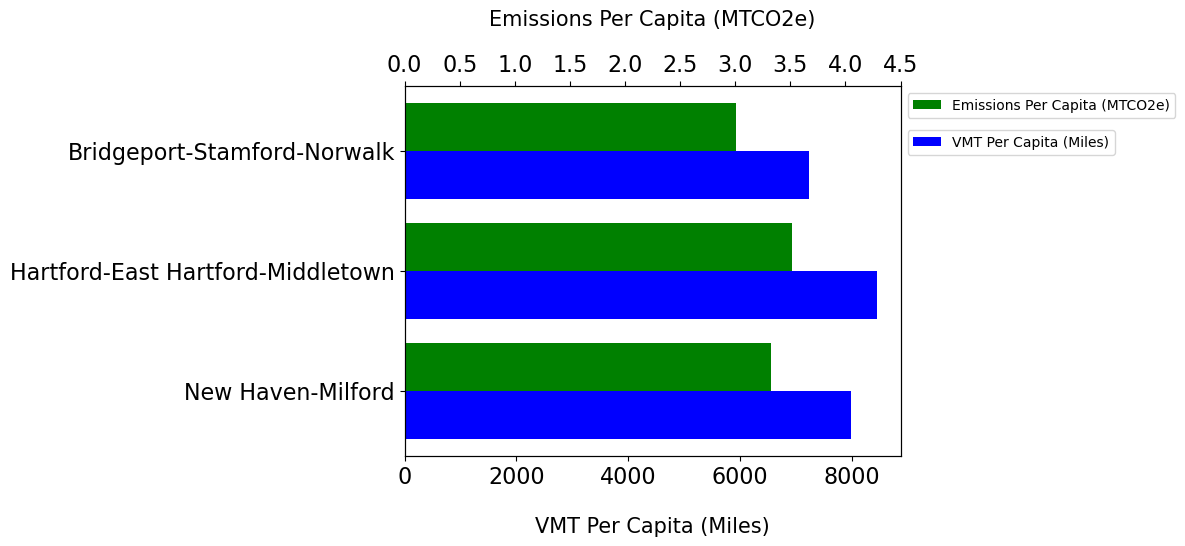

In [28]:
# Create the first bar plot for Miles Per Capita
fig, ax1 = plt.subplots()

ax1.barh(Y_axis - 0.2, calcualted, 0.4, label='VMT Per Capita (Miles)', color='b')
# Set labels and ticks for the first y-axis
ax1.set_xlabel("VMT Per Capita (Miles)", fontsize=15, labelpad=20)
ax1.set_xticks(np.arange(0, max(calcualted) + 1, 2000))
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_yticks(Y_axis)
ax1.set_yticklabels(X)

# Create the second y-axis for Emissions Per Capita
ax2 = ax1.twiny()

ax2.barh(Y_axis + 0.2, inventory, 0.4, label='Emissions Per Capita (MTCO2e)', color='g')
# Set labels and ticks for the second y-axis
ax2.set_xlabel("Emissions Per Capita (MTCO2e)", fontsize=15, labelpad=20)
ax2.set_xticks(np.arange(0, max(inventory) + 1, 0.5))
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_yticks(Y_axis)
#ax2.set_yticklabels([])  # Remove y-axis labels for the second y-axis

# Add legends
ax1.legend(loc='upper left',bbox_to_anchor=(1, 0.9))
ax2.legend(loc='upper left',bbox_to_anchor=(1, 1))

# Save or display the plot
plt.savefig('../../../figures/Report-images/emissions-capita--vmt-capita.png', dpi=600, bbox_inches='tight')
#plt.show()

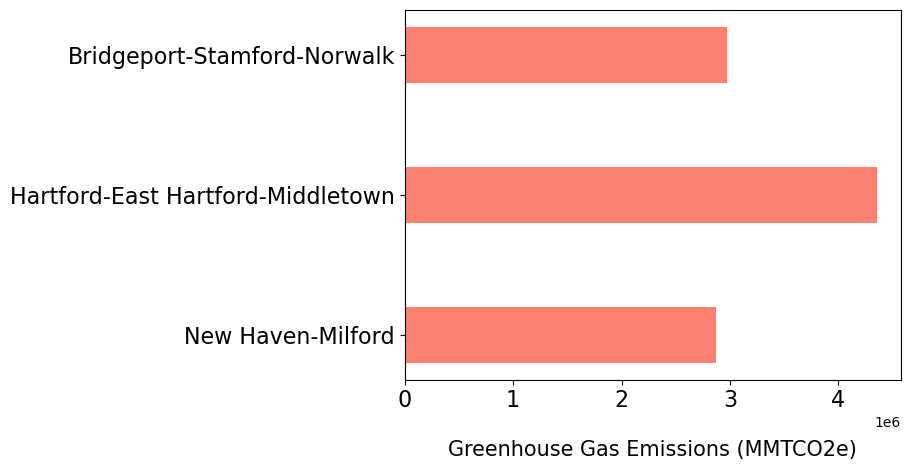

In [29]:

msa = df.iloc[0:3,0]
values = df.iloc[0:3,7]*1000000
plt.barh(msa, values, 0.4, color="salmon")
plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)

plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)

#plt.show() 

plt.savefig('../../../figures/Report-images/ghg-emissions-mobile.png', dpi=600,bbox_inches='tight')

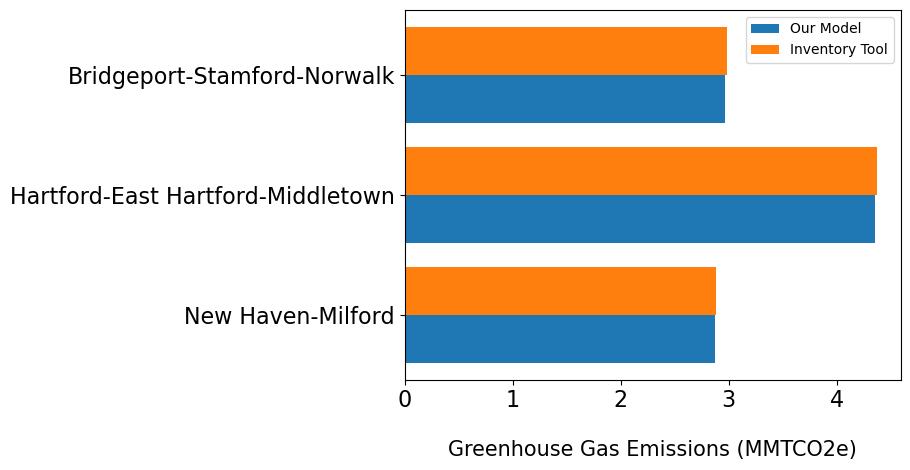

In [30]:
#compare the result with the inventory tool
calcualted = df['GHG Emissions(MMTCO2e)'][:3]#NH, HH, BSN
inventory = [2886344/1000000, 4371937/1000000, 2980260/1000000]

X = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']


Y_axis = np.arange(len(X))

plt.barh(Y_axis - 0.2, calcualted, 0.4, label='Our Model')
plt.barh(Y_axis + 0.2, inventory, 0.4, label='Inventory Tool')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend()
#plt.show()
plt.savefig('../../../figures/our-model-vs-lggit-mobile.png', dpi=600,bbox_inches='tight')

In [31]:
#calcualte the gasoline and diesel emissions: carbon dioxide emissions only
gaso_emissions_NH =gaso_consump_NH*gasoline/1000+NH_automobile_vmt*CH4_gaso_passenger_car/1000000+NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000+NH_automobile_vmt*N2O_gaso_passenger_car/1000000 + NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000
gaso_emissions_HH = gaso_consump_HH*gasoline/1000+HH_automobile_vmt*CH4_gaso_passenger_car/1000000+HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000+HH_automobile_vmt*N2O_gaso_passenger_car/1000000 + HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000
gaso_emissions_BSN= gaso_consump_BSN*gasoline/1000+BSN_automobile_vmt*CH4_gaso_passenger_car/1000000+BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000+BSN_automobile_vmt*N2O_gaso_passenger_car/1000000+BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000

#calcualte the diesel consumption 
dies_emissions_NH =dies_consump_NH*diesel/1000+NH_buses_vmt*CH4_buses/1000000+NH_trucks_vmt*CH4_trucks/1000000+NH_buses_vmt*N2O_buses/1000000+NH_trucks_vmt*N2O_trucks/1000000
dies_emissions_HH = dies_consump_HH*diesel/1000+HH_buses_vmt*CH4_buses/1000000+HH_trucks_vmt*CH4_trucks/1000000+HH_buses_vmt*N2O_buses/1000000+HH_trucks_vmt*N2O_trucks/1000000
dies_emissions_BSN= dies_consump_BSN*diesel/1000+BSN_buses_vmt*CH4_buses/1000000+BSN_trucks_vmt*CH4_trucks/1000000+BSN_buses_vmt*N2O_buses/1000000+BSN_trucks_vmt*N2O_trucks/1000000




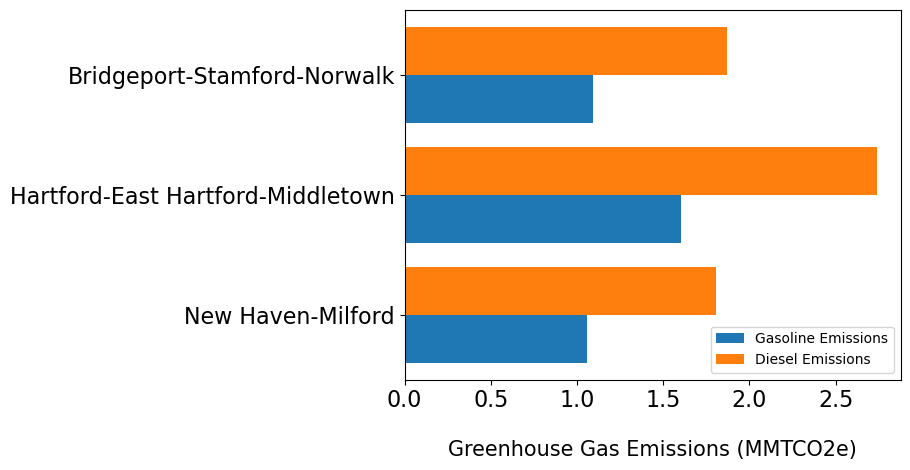

In [32]:
X = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
gasol = [gaso_emissions_NH/1000000, gaso_emissions_HH/1000000, gaso_emissions_BSN/1000000]
die = [dies_emissions_NH/1000000, dies_emissions_HH/1000000, dies_emissions_BSN/1000000]

Y_axis = np.arange(len(X))

plt.barh(Y_axis - 0.2, gasol, 0.4, label='Gasoline Emissions')
plt.barh(Y_axis + 0.2, die, 0.4, label='Diesel Emissions')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend()
#plt.show()
plt.savefig('../../../figures/Report-images/die-gaso-msa-emissions-comparison.png', dpi=600,bbox_inches='tight')

In [33]:
result=df[['MSA', 'GHG Emissions(MMTCO2e)','CO2 Emissions(MMTCO2e)','CH4 Emissions (TMTCO2e)','N2O Emissions(TMTCO2e)','emissions per capita (MTCO2e)']][0:3]

NH_automobile = (NH_automobile_vmt/passenger_car_gasoline*gasoline/1000+NH_automobile_vmt*CH4_gaso_passenger_car/1000000*25+NH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)/1000000
NH_motorcycle = (NH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000+NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25+NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)/1000000
NH_buses = (NH_buses_vmt/heavy_duty_diesel*diesel/1000+NH_buses_vmt*CH4_buses/1000000*25+NH_buses_vmt*N2O_buses/1000000*298)/1000000
NH_trucks = (NH_trucks_vmt/light_truck_diesel*diesel/1000+NH_trucks_vmt*CH4_trucks/1000000*25+NH_trucks_vmt*N2O_trucks/1000000*298)/1000000



#add the emissions from different fuel
result['Gasoline Emissions (MMTCO2e)'] = gasol
result['Diesel Emissions (MMTCO2e)'] = die
result['Automobile (MMTCO2e)']=[NH_automobile,HH_automobile,BSN_automobile]
result['Motorcycle (MMTCO2e)']=[NH_motorcycle,HH_motorcycle,BSN_motorcycle]
result['Buses (MMTCO2e)']=[NH_buses,HH_buses,BSN_buses]
result['Trucks (MMTCO2e)']=[NH_trucks,HH_trucks,BSN_trucks]

#emissions from different fuel
result

,MSA,GHG Emissions(MMTCO2e),CO2 Emissions(MMTCO2e),CH4 Emissions (TMTCO2e),N2O Emissions(TMTCO2e),emissions per capita (MTCO2e),Gasoline Emissions (MMTCO2e),Diesel Emissions (MMTCO2e),Automobile (MMTCO2e),Motorcycle (MMTCO2e),Buses (MMTCO2e),Trucks (MMTCO2e)
0,New Haven-Milford,2.875389,2.867682,0.661296,7.046291,3.325107,1.059169,1.808563,1.028899,0.036643,0.020234,1.789613
1,Hartford-East Hartford-Middletown,4.355344,4.343670,1.001664,10.672997,3.515527,1.604320,2.739426,1.558471,0.055503,0.030649,2.710721
2,Bridgeport-Stamford-Norwalk,2.968949,2.960991,0.682814,7.275563,3.010054,1.093632,1.867410,1.062378,0.037835,0.020893,1.847843


In [34]:
CO2 = ['CO2 emissions (TMMTCO2e)',NH_automobile_vmt/passenger_car_gasoline*gasoline/1000000000,HH_automobile_vmt/passenger_car_gasoline*gasoline/1000000000,BSN_automobile_vmt/passenger_car_gasoline*gasoline/1000000000,NH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000000000,
      HH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000000000,BSN_motorcycle_vmt/motorcycle_gasoline*gasoline/1000000000,NH_trucks_vmt/light_truck_diesel*diesel/1000000000,HH_trucks_vmt/light_truck_diesel*diesel/1000000000,BSN_trucks_vmt/light_truck_diesel*diesel/1000000000,
      NH_buses_vmt/heavy_duty_diesel*diesel/1000000000,HH_buses_vmt/heavy_duty_diesel*diesel/1000000000,BSN_buses_vmt/heavy_duty_diesel*diesel/1000000000,result['CO2 Emissions(MMTCO2e)'][0],result['CO2 Emissions(MMTCO2e)'][1],result['CO2 Emissions(MMTCO2e)'][2]]#MMTCO2e
CH4 = ['CH4 emissions (TMTCO2e)',NH_automobile_vmt*CH4_gaso_passenger_car/1000000000*25,HH_automobile_vmt*CH4_gaso_passenger_car/1000000000*25,BSN_automobile_vmt*CH4_gaso_passenger_car/1000000000*25,NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000000*25,
       HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000000*25,BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000000*25,NH_trucks_vmt*CH4_trucks/1000000000*25,NH_buses_vmt*CH4_buses/1000000000*25,HH_trucks_vmt*CH4_trucks/1000000000*25,HH_buses_vmt*CH4_buses/1000000000*25,
       BSN_trucks_vmt*CH4_trucks/1000000000*25,BSN_buses_vmt*CH4_buses/1000000000*25,result['CH4 Emissions (TMTCO2e)'][0],result['CH4 Emissions (TMTCO2e)'][1],result['CH4 Emissions (TMTCO2e)'][2]]#MTCO2e
#N2O = result['N2O emissions (MMTCO2e)']=
N2O = ['N2O emissions (TMTCO2e)',NH_automobile_vmt*N2O_gaso_passenger_car/1000000000*298,HH_automobile_vmt*N2O_gaso_passenger_car/1000000000*298,BSN_automobile_vmt*N2O_gaso_passenger_car/1000000000*298,NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000000*298,
       HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000000*298,BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000000*298,NH_trucks_vmt*N2O_trucks/1000000000*298,NH_buses_vmt*N2O_buses/1000000000*298,HH_trucks_vmt*N2O_trucks/1000000000*298,HH_buses_vmt*N2O_buses/1000000000*298,
       BSN_trucks_vmt*N2O_trucks/1000000000*298,BSN_buses_vmt*N2O_buses/1000000000*298,result['N2O Emissions(TMTCO2e)'][0],result['N2O Emissions(TMTCO2e)'][1],result['N2O Emissions(TMTCO2e)'][2]]#MTCO2e
       
       
       
      
CH4

['CH4 emissions (TMTCO2e)',
 0.5613177880782881,
 0.8502265107739269,
 0.579581994628631,
 0.0,
 0.0,
 0.0,
 0.09677474621057934,
 0.0032039573891250997,
 0.14658444209178947,
 0.00485302545096654,
 0.09992361124066906,
 0.003308208030698063,
 0.6612964916779925,
 1.001663978316683,
 0.6828138138999982]

In [42]:
def result_from_mobile_combustion():
    return result

def CO2_emissions():
    return CO2

def CH4_emissions():
    return CH4

def N2O_emissions():
    return N2O

In [44]:
CO2

['CO2 emissions (TMMTCO2e)',
 1.0224834396944749,
 1.5487528557251198,
 1.0557530939500788,
 0.03664317232391092,
 0.05550331240224523,
 0.037835471022077904,
 1.7883622783891673,
 2.708827427614788,
 1.8465521642845812,
 0.020192842557387198,
 0.030586043119980474,
 0.02084987900828841,
 2.8676817329649404,
 4.343669638862134,
 2.9609906082650266]

In [46]:
CO2_df = pd.DataFrame({'CO2': CO2})
CH4_df = pd.DataFrame({'CH4': CH4})
N2O_df = pd.DataFrame({'N2O': N2O})


result.to_csv('../../../results/mobile-emissions-automated-sheet.csv')
# Save to CSV files
CO2_df.to_csv('../../../results/CO2-automated-sheet.csv', index=False)
CH4_df.to_csv('../../../results/CH4-automated-sheet.csv', index=False)
N2O_df.to_csv('../../../results/N2O-automated-sheet.csv', index=False)

In [37]:
result.to_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/Mobile-combustion-emissions.csv')

In [38]:
result.to_csv('C:/Users/peiyaozhao/NARS Dropbox/Projects/CT-GHG-Inventories/Results/2021-Mobile-combustion-emissions.csv')

In [39]:
print(NH_automobile_vmt/passenger_car_gasoline*gasoline/1000,NH_automobile_vmt*CH4_gaso_passenger_car/1000000*25,NH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)
print(NH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000,NH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25,NH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)
print(NH_buses_vmt/heavy_duty_diesel*diesel/1000,NH_buses_vmt*CH4_buses/1000000*25,NH_buses_vmt*N2O_buses/1000000*298)
print(NH_trucks_vmt/light_truck_diesel*diesel/1000,NH_trucks_vmt*CH4_trucks/1000000*25,NH_trucks_vmt*N2O_trucks/1000000*298)

print(HH_automobile_vmt/passenger_car_gasoline*gasoline/1000,HH_automobile_vmt*CH4_gaso_passenger_car/1000000*25,HH_automobile_vmt*N2O_gaso_passenger_car/1000000*298)
print(HH_motorcycle_vmt/motorcycle_gasoline*gasoline/1000,HH_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25,HH_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)
print(NH_buses_vmt/heavy_duty_diesel*diesel/1000,HH_buses_vmt*CH4_buses/1000000*25,HH_buses_vmt*N2O_buses/1000000*298)
print(NH_trucks_vmt/light_truck_diesel*diesel/1000,HH_trucks_vmt*CH4_trucks/1000000*25,HH_trucks_vmt*N2O_trucks/1000000*298)

print(BSN_automobile_vmt/passenger_car_gasoline*gasoline/1000,BSN_automobile_vmt*CH4_gaso_passenger_car/1000000*25,BSN_automobile_vmt*N2O_gaso_passenger_car/1000000*298)
print(BSN_motorcycle_vmt/motorcycle_gasoline*gasoline/1000,BSN_motorcycle_vmt*CH4_gaso_motorcycle/1000000*25,BSN_motorcycle_vmt*N2O_gaso_motorcycle/1000000*298)
print(NH_buses_vmt/heavy_duty_diesel*diesel/1000,BSN_buses_vmt*CH4_buses/1000000*25,BSN_buses_vmt*N2O_buses/1000000*298)
print(NH_trucks_vmt/light_truck_diesel*diesel/1000,BSN_trucks_vmt*CH4_trucks/1000000*25,BSN_trucks_vmt*N2O_trucks/1000000*298)

1022483.4396944748 561.3177880782881 5854.544529656545
36643.17232391092 0.0 0.0
20192.8425573872 3.2039573891250996 38.19117207837119
1788362.2783891673 96.77474621057934 1153.5549748301057
1548752.8557251198 850.226510773927 8867.862507372058
55503.31240224523 0.0 0.0
20192.8425573872 4.853025450966539 57.84806337552115
1788362.2783891673 146.58444209178947 1747.2865497341304
1055753.0939500788 579.581994628631 6045.040203976621
37835.4710220779 0.0 0.0
20192.8425573872 3.308208030698063 39.43383972592091
1788362.2783891673 99.92361124066906 1191.0894459887752
